In [2]:
import pandas
from itertools import product
import sys, argparse, os
import numpy as np
from math import log, ceil
from scipy.stats import multinomial, chi2
from math import factorial
import re
import os

## Biopython - Phylo

In [3]:
from Bio import Phylo

In [4]:
from io import BytesIO     # for handling byte strings
from io import StringIO    # for handling unicode strings

In [5]:
treedata = "(Andex_insignis:0.88489,((Canthyporus_hottentotus:1.43450,((((((((((Heterosternusa_pulcher:2.14201,Hydroporus_fortis:0.02166):0.65409,Hydroporus_axillaris:0.63198):0.00000,((Hydroporus_neglectus:1.07853,Hydroporus_scalesianus:0.83301):0.15218,((Neoporus_arizonicus:1.27684,Neoporus_undulatus:1.01511):0.25633,(Suphrodytes_dorsalis:0.56179,Suphrodytes_figuratus:0.21590):0.40226):0.31090):0.30229):0.04464,(((Hydroporus_appalachius:0.20023,Hydroporus_mannerheimi:0.12852):0.17270,Sanfilippodytes_terminalis:0.91664):0.20285,((((Hydroporus_carri:0.01594,Hydroporus_longiusculus:0.00000):0.48684,Hydroporus_nigellus:0.37304):0.15924,(Hydroporus_lapponum:0.12649,Hydroporus_submuticus:0.05930):0.29198):0.18409,(((Hydroporus_erythrocephalus:0.56960,Hydroporus_obscurus:0.47038):0.35433,Hydroporus_rufifrons:0.54930):0.00087,(Hydroporus_niger:0.28072,Hydroporus_notabilis:0.38240):0.44650):0.12585):0.08013):0.07883):0.10353,Hydrocolus_sahlbergi:1.08298):0.08342,((Hydroporus_sinuatipes:0.08032,Hydroporus_tristis:0.35177):0.35289,Hydroporus_vagepictus:0.33153):0.19816):0.13062,Hydroporus_puberulus:0.98432):0.03671,(Hydroporus_kraatzii:0.46285,Hydroporus_memnonius:0.41284):0.44021):0.12842,(((Hydroporus_nigrita:0.41476,Hydroporus_pubescens:0.60549):0.14125,Hydroporus_pilosus:0.56165):0.00017,Hydroporus_tessellatus:0.60630):0.15117):0.16789,Laccornellus_copelatoides:0.95647):0.04894):0.32400,Hyphydrus_ovatus:1.41331):0.06764,Hovahydrus_minutissimus:1.24682):0.00000;"
handle = StringIO(treedata)
tree = Phylo.read(handle, "newick")

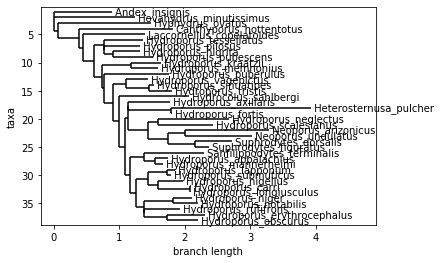

In [8]:
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [7]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=0.88489, name='Andex_insignis')
        Clade(branch_length=1.24682, name='Hovahydrus_minutissimus')
        Clade(branch_length=0.06764)
            Clade(branch_length=1.41331, name='Hyphydrus_ovatus')
            Clade(branch_length=0.324)
                Clade(branch_length=1.4345, name='Canthyporus_hottentotus')
                Clade(branch_length=0.04894)
                    Clade(branch_length=0.95647, name='Laccornellus_copelatoides')
                    Clade(branch_length=0.16789)
                        Clade(branch_length=0.15117)
                            Clade(branch_length=0.6063, name='Hydroporus_tessellatus')
                            Clade(branch_length=0.00017)
                                Clade(branch_length=0.56165, name='Hydroporus_pilosus')
                                Clade(branch_length=0.14125)
                                    Clade(branch_length=0.41476, name=

In [39]:
Phylo.draw_ascii(tree)

  _________ Andex_insignis
 |
 |    ________________ Canthyporus_hottentotus
 |   |
 |   |                 _________________________ Heterosternusa_pulcher
 |   |         _______|
 |   |        |       | Hydroporus_fortis
 |   |        |
 |   |        |_______ Hydroporus_axillaris
 |   |        |
 |   |        |      ___________ Hydroporus_neglectus
 |   |        |    _|
 |   |        |   | |________ Hydroporus_scalesianus
 |   |        |   |
 |   |        |___|      _______________ Neoporus_arizonicus
 |   |        |   |   __|
 |   |        |   |  |  |____________ Neoporus_undulatus
 |   |        |   |__|
 |   |        |      |     ______ Suphrodytes_dorsalis
 |   |        |      |____|
 |   |       _|           |__ Suphrodytes_figuratus
 |   |      | |
 |   |      | |     _ Hydroporus_appalachius
 |   |      | |   _|
 |   |      | |__| |_ Hydroporus_mannerheimi
 |   |      | |  |
 |   |      | |  |__________ Sanfilippodytes_terminalis
 |   |      | |
 |   |      | |          , Hydrop

## dendropy

### Read in files from Tree

In [67]:
import dendropy
from dendropy.calculate import treecompare
import random

In [84]:
taxon_namespace = dendropy.TaxonSet()
tree1 = dendropy.Tree.get(path="./mytree.nwk", schema="newick", taxon_set=taxon_namespace)
tree2 = dendropy.Tree.get(path="./mytree2.nwk", schema="newick", taxon_set=taxon_namespace)

/home/howard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'TaxonSet' will no longer be supported in future releases; use 'TaxonNamespace' instead
  """Entry point for launching an IPython kernel.


In [85]:
def process_node(node, start=1.0):
    if node.parent_node is None:
        node.value = start
    else:
        node.value = random.gauss(node.parent_node.value, node.edge.length)
    for child in node.child_nodes():
        process_node(child)
    if node.taxon is not None:
        print("%s : %s" % (node.taxon, node.value))

In [86]:
process_node(tree1.seed_node)

'Andex insignis' : 0.03259275357101321
'Canthyporus hottentotus' : 2.8941130182860744
'Heterosternusa pulcher' : -1.0567336130802105
'Hydroporus fortis' : 0.911772785854604
'Hydroporus axillaris' : 0.010733383559803245
'Hydroporus neglectus' : -0.26559852937146167
'Hydroporus scalesianus' : 1.235747263559728
'Neoporus arizonicus' : 2.9600506453605977
'Neoporus undulatus' : 1.6791998467463691
'Suphrodytes dorsalis' : -0.5728491773777612
'Suphrodytes figuratus' : -0.19874720224180353
'Hydroporus appalachius' : 1.137646885882234
'Hydroporus mannerheimi' : 0.7935938889110015
'Sanfilippodytes terminalis' : 0.9681499987349029
'Hydroporus carri' : 0.5095795704136105
'Hydroporus longiusculus' : 0.5437703847719672
'Hydroporus nigellus' : 0.5700033786378279
'Hydroporus lapponum' : 0.7290027216161004
'Hydroporus submuticus' : 0.36622704538697404
'Hydroporus erythrocephalus' : 0.24181243145152356
'Hydroporus obscurus' : 0.987286488866797
'Hydroporus rufifrons' : 0.713088138618098
'Hydroporus niger

In [75]:
def evolve_char(tree, start=1.0):
    for node in tree.preorder_node_iter():
        if node.parent_node is None:
            node.value = 1.0
        else:
            node.value = random.gauss(node.parent_node.value, node.edge.length)
    return tree

In [76]:
evolve_char(tree1)
for node in tree1.leaf_iter():
    print("%s : %s" % (node.taxon, node.value))

'Andex insignis' : 0.6866516192621006
'Canthyporus hottentotus' : 0.658733935279275
'Heterosternusa pulcher' : -1.5695787586669163
'Hydroporus fortis' : 1.0629005038994597
'Hydroporus axillaris' : 0.633480342566183
'Hydroporus neglectus' : 1.5299396277065287
'Hydroporus scalesianus' : -0.3162712878290802
'Neoporus arizonicus' : 0.6637855184393762
'Neoporus undulatus' : 1.8761847019527989
'Suphrodytes dorsalis' : 1.310512804948172
'Suphrodytes figuratus' : 1.0963340103113486
'Hydroporus appalachius' : 0.6385557730697262
'Hydroporus mannerheimi' : 0.8557000726078351
'Sanfilippodytes terminalis' : 0.9833825656837478
'Hydroporus carri' : 1.1750384845754342
'Hydroporus longiusculus' : 1.1678078680595454
'Hydroporus nigellus' : 1.2593128013538277
'Hydroporus lapponum' : 0.9181648426964252
'Hydroporus submuticus' : 0.7409772101816678
'Hydroporus erythrocephalus' : 0.0689788663433577
'Hydroporus obscurus' : 1.188887879019913
'Hydroporus rufifrons' : -0.3310949262000551
'Hydroporus niger' : 0.3

/home/howard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  


In [77]:
mle_len = tree1.length()
for edge in tree1.postorder_edge_iter():
    edge.length = None
print(tree1.as_string(schema="newick"))

(Andex_insignis,((Canthyporus_hottentotus,((((((((((Heterosternusa_pulcher,Hydroporus_fortis),Hydroporus_axillaris),((Hydroporus_neglectus,Hydroporus_scalesianus),((Neoporus_arizonicus,Neoporus_undulatus),(Suphrodytes_dorsalis,Suphrodytes_figuratus)))),(((Hydroporus_appalachius,Hydroporus_mannerheimi),Sanfilippodytes_terminalis),((((Hydroporus_carri,Hydroporus_longiusculus),Hydroporus_nigellus),(Hydroporus_lapponum,Hydroporus_submuticus)),(((Hydroporus_erythrocephalus,Hydroporus_obscurus),Hydroporus_rufifrons),(Hydroporus_niger,Hydroporus_notabilis))))),Hydrocolus_sahlbergi),((Hydroporus_sinuatipes,Hydroporus_tristis),Hydroporus_vagepictus)),Hydroporus_puberulus),(Hydroporus_kraatzii,Hydroporus_memnonius)),(((Hydroporus_nigrita,Hydroporus_pubescens),Hydroporus_pilosus),Hydroporus_tessellatus)),Laccornellus_copelatoides)),Hyphydrus_ovatus),Hovahydrus_minutissimus);



In [87]:
tree1.as_string(schema="newick")

'(Andex_insignis:0.88489,((Canthyporus_hottentotus:1.4345,((((((((((Heterosternusa_pulcher:2.14201,Hydroporus_fortis:0.02166):0.65409,Hydroporus_axillaris:0.63198):0.0,((Hydroporus_neglectus:1.07853,Hydroporus_scalesianus:0.83301):0.15218,((Neoporus_arizonicus:1.27684,Neoporus_undulatus:1.01511):0.25633,(Suphrodytes_dorsalis:0.56179,Suphrodytes_figuratus:0.2159):0.40226):0.3109):0.30229):0.04464,(((Hydroporus_appalachius:0.20023,Hydroporus_mannerheimi:0.12852):0.1727,Sanfilippodytes_terminalis:0.91664):0.20285,((((Hydroporus_carri:0.01594,Hydroporus_longiusculus:0.0):0.48684,Hydroporus_nigellus:0.37304):0.15924,(Hydroporus_lapponum:0.12649,Hydroporus_submuticus:0.0593):0.29198):0.18409,(((Hydroporus_erythrocephalus:0.5696,Hydroporus_obscurus:0.47038):0.35433,Hydroporus_rufifrons:0.5493):0.00087,(Hydroporus_niger:0.28072,Hydroporus_notabilis:0.3824):0.4465):0.12585):0.08013):0.07883):0.10353,Hydrocolus_sahlbergi:1.08298):0.08342,((Hydroporus_sinuatipes:0.08032,Hydroporus_tristis:0.35177

In [88]:
tree1_distance = tree1.phylogenetic_distance_matrix()

In [89]:
print(tree1_distance.mean_pairwise_distance())

2.403111593172116


In [90]:
for i, t1 in enumerate(tree1.taxon_namespace[:-1]):
    for t2 in tree1.taxon_namespace[i+1:]:
        print("Distance between '%s' and '%s': %s" % (t1.label, t2.label, tree1_distance(t1, t2)))

Distance between 'Andex insignis' and 'Canthyporus hottentotus': 2.71103
Distance between 'Andex insignis' and 'Heterosternusa pulcher': 4.8168
Distance between 'Andex insignis' and 'Hydroporus fortis': 2.69645
Distance between 'Andex insignis' and 'Hydroporus axillaris': 2.65268
Distance between 'Andex insignis' and 'Hydroporus neglectus': 3.5536999999999996
Distance between 'Andex insignis' and 'Hydroporus scalesianus': 3.3081799999999997
Distance between 'Andex insignis' and 'Neoporus arizonicus': 4.167059999999999
Distance between 'Andex insignis' and 'Neoporus undulatus': 3.9053299999999993
Distance between 'Andex insignis' and 'Suphrodytes dorsalis': 3.5979399999999995
Distance between 'Andex insignis' and 'Suphrodytes figuratus': 3.2520499999999997
Distance between 'Andex insignis' and 'Hydroporus appalachius': 2.63067
Distance between 'Andex insignis' and 'Hydroporus mannerheimi': 2.55896
Distance between 'Andex insignis' and 'Sanfilippodytes terminalis': 3.1743799999999998
Dis

In [82]:
for idx1, taxon1 in enumerate(tree1.taxon_namespace):
    for taxon2 in tree1.taxon_namespace:
        mrca = tree1_distance.mrca(taxon1, taxon2)
        weighted_patristic_distance = tree1_distance.patristic_distance(taxon1, taxon2)
        unweighted_patristic_distance = tree1_distance.path_edge_count(taxon1, taxon2)
        print("'{}' vs '{}': {} (distance (weighted-edges, unweighted-edges) = {}, {})".format(
            taxon1.label,
            taxon2.label,
            mrca.bipartition.split_as_bitstring(),
            weighted_patristic_distance,
            unweighted_patristic_distance))

'Andex insignis' vs 'Andex insignis': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 0)
'Andex insignis' vs 'Canthyporus hottentotus': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 4)
'Andex insignis' vs 'Heterosternusa pulcher': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 14)
'Andex insignis' vs 'Hydroporus fortis': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 14)
'Andex insignis' vs 'Hydroporus axillaris': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 13)
'Andex insignis' vs 'Hydroporus neglectus': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 14)
'Andex insignis' vs 'Hydroporus scalesianus': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 14)
'Andex insignis' vs 'Neoporus arizonicus': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 15)
'Andex insignis' vs 'Neoporus undulatus': 0 (distance (weighted-edges, unweighted-edges) = 0.0, 15)
'Andex insignis' vs 'Suphrodytes dorsalis': 0 (distance (weighted-edges, unweighted-edges

In [48]:
s = tree1.as_ascii_plot()
print(s)

/----------------------------------------------------------------------------------------------------- Andex insignis            
|                                                                                                                                
|            /---------------------------------------------------------------------------------------- Canthyporus hottentotus   
|            |                                                                                                                   
|            |                                                                                 /------ Heterosternusa pulcher    
|            |                                                                          /------+                                 
|            |                                                            /-------------+      \------ Hydroporus fortis         
|            |                                                            |             | 

In [10]:
tree1.print_plot()

/----------------------------------------------------------------------------------------------------- Andex insignis            
|                                                                                                                                
|            /---------------------------------------------------------------------------------------- Canthyporus hottentotus   
|            |                                                                                                                   
|            |                                                                                 /------ Heterosternusa pulcher    
|            |                                                                          /------+                                 
|            |                                                            /-------------+      \------ Hydroporus fortis         
|            |                                                            |             | 

In [11]:
tree2.print_plot()

/----------------------------------------------------------------------------------------------------- Andex insignis            
|                                                                                                                                
|            /---------------------------------------------------------------------------------------- Canthyporus hottentotus   
|            |                                                                                                                   
|            |                                                                                 /------ Heterosternusa pulcher    
|            |                                                                          /------+                                 
|            |                                                            /-------------+      \------ Hydroporus fortis         
|            |                                                            |             | 

In [12]:
tree1.encode_bipartitions()
tree2.encode_bipartitions()

In [13]:
print(treecompare.symmetric_difference(tree1, tree2))

0


In [14]:
pdm = tree1.phylogenetic_distance_matrix()

In [15]:
mntd = pdm.mean_nearest_taxon_distance()

In [16]:
pdm.as_data_table(is_weighted_edge_distances=True)

In [17]:
pdm.write_csv('Distance_matrix.csv',
              is_first_row_column_names=False,
              delimiter = ",")

In [117]:
s1 = "((A,D),(C,B));"
s2 = "((A,B),(D,C));"
taxon_namespace = dendropy.TaxonSet()
t1 = dendropy.Tree.get_from_string(
        s1,
        "newick",
        taxon_set=taxon_namespace)
t2 = dendropy.Tree.get_from_string(
        s2,
        "newick",
        taxon_set=taxon_namespace)

/home/howard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'TaxonSet' will no longer be supported in future releases; use 'TaxonNamespace' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/howard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'taxon_set' will no longer be supported in future releases; use 'taxon_namespace' instead
  import sys
/home/howard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'taxon_set' will no longer be supported in future releases; use 'taxon_namespace' instead
  # This is added back by InteractiveShellApp.init_path()


In [118]:
print(treecompare.symmetric_difference(t1, t2))

2


In [119]:
t1.print_plot()

                                                               /--------------------------------------------------------------- A
/--------------------------------------------------------------+                                                                 
|                                                              \--------------------------------------------------------------- D
+                                                                                                                                
|------------------------------------------------------------------------------------------------------------------------------ C
|                                                                                                                                
\------------------------------------------------------------------------------------------------------------------------------ B
                                                                                          

In [120]:
t2.print_plot()

                                                               /--------------------------------------------------------------- A
/--------------------------------------------------------------+                                                                 
|                                                              \--------------------------------------------------------------- B
+                                                                                                                                
|------------------------------------------------------------------------------------------------------------------------------ D
|                                                                                                                                
\------------------------------------------------------------------------------------------------------------------------------ C
                                                                                          

In [115]:
Phylo.draw(t2)

AttributeError: 'Tree' object has no attribute 'depths'

### Read in files from distance matrix

In [93]:
pdm1 = dendropy.PhylogeneticDistanceMatrix.from_csv(
        src=open("../training_csv/Bergsten_2013/alignment_COI_1stpos-out_tree.csv"),
        delimiter=",")

In [95]:
nj_tree_weighted = pdm1.nj_tree(is_weighted_edge_distances=True)
nj_tree_unweighted = pdm1.nj_tree(is_weighted_edge_distances=False)

KeyError: <Taxon 0x7efbf575fed0 'Laccornellus copelatoides'>

In [88]:
nj_tree

In [98]:
print(nj_tree.as_string('newick'))

[&U] (Hydroporus_axillaris:0.010272052209682626,((Heterosternusa_pulcher:0.06963143945587608,Hydroporus_fortis:0.0007041129493392945):0.021262845754078545,((((Suphrodytes_figuratus:0.007018374227255553,Suphrodytes_dorsalis:0.018262401376238486):0.013076476223510042,(Neoporus_arizonicus:0.04150690573565986,Neoporus_undulatus:0.032998711726861404):0.008332653384309439):0.01010658891734019,(Hydroporus_scalesianus:0.0270790917788149,Hydroporus_neglectus:0.03506033883891581):0.004946994858285092):0.009826699143849354,((Hydrocolus_sahlbergi:0.035204997316503985,((Hydroporus_vagepictus:0.010777219117934334,(Hydroporus_tristis:0.01143517138453769,Hydroporus_sinuatipes:0.0026110042516589178):0.011471579810357641):0.006441690768286051,(Hydroporus_puberulus:0.031997805092043474,((Hydroporus_memnonius:0.013420405817416305,Hydroporus_kraatzii:0.015046107045322953):0.014310136723391216,((Laccornellus_copelatoides:0.031092470575002865,(Canthyporus_hottentotus:0.04663204182027825,(Hyphydrus_ovatus:0.0

### Write CSV files

In [67]:
folder_list = ['Bergsten_2013', 'Broughton_2013', 'Brown_2012', 'Cannon_2016_dna']

In [68]:
for folder in folder_list:
    file_path = '../training/' + folder + '/'
    files_list = os.listdir(file_path)
    for file in files_list:
        if file.find('.nex.treefile') > 0:
            file_base_name = file[0:file.find('.nex.treefile')]
            file_treefile = file_base_name + '.nex.treefile'
            file_treefile_path = os.path.join(file_path, file_treefile)
            print(file_treefile_path)
            tree = dendropy.Tree.get(path=file_treefile_path, schema="newick", taxon_set=taxon_namespace)
            dist_matrix_output = os.path.join('../training_csv', folder, file_base_name+'_tree.csv')
            pdm.write_csv(dist_matrix_output,
                          delimiter = ",")

../training/Bergsten_2013/alignment_H3_3rdpos-out.nex.treefile
../training/Bergsten_2013/alignment_H3_2ndpos-out.nex.treefile
../training/Bergsten_2013/alignment_18S-out.nex.treefile
../training/Bergsten_2013/alignment_H3_3rdpos-out.nex.treefile
../training/Bergsten_2013/alignment_COI_2ndpos-out.nex.treefile
../training/Bergsten_2013/alignment_H3_1stpos-out.nex.treefile
../training/Bergsten_2013/alignment_COI_2ndpos-out.nex.treefile
../training/Bergsten_2013/alignment_COI_3rdpos-out.nex.treefile
../training/Bergsten_2013/alignment_H3_1stpos-out.nex.treefile
../training/Bergsten_2013/alignment_COI_1stpos-out.nex.treefile
../training/Bergsten_2013/alignment_H3_2ndpos-out.nex.treefile
../training/Bergsten_2013/alignment_18S-out.nex.treefile
../training/Bergsten_2013/alignment_COI_1stpos-out.nex.treefile
../training/Bergsten_2013/alignment_16S-out.nex.treefile
../training/Bergsten_2013/alignment_16S-out.nex.treefile
../training/Bergsten_2013/alignment_COI_3rdpos-out.nex.treefile
../trainin

../training/Broughton_2013/alignment_panx2_1stpos-out.nex.treefile
../training/Broughton_2013/alignment_plagl2_2ndpos-out.nex.treefile
../training/Broughton_2013/alignment_tbccl_2ndpos-out.nex.treefile
../training/Broughton_2013/alignment_rag1_1stpos-out.nex.treefile
../training/Broughton_2013/alignment_ryr3_3rdpos-out.nex.treefile
../training/Broughton_2013/alignment_enc1_3rdpos-out.nex.treefile
../training/Broughton_2013/alignment_rag2_1stpos-out.nex.treefile
../training/Broughton_2013/alignment_rag1_3rdpos-out.nex.treefile
../training/Broughton_2013/alignment_snx33_3rdpos-out.nex.treefile
../training/Broughton_2013/alignment_gtdc2_1stpos-out.nex.treefile
../training/Broughton_2013/alignment_ryr3_1stpos-out.nex.treefile
../training/Broughton_2013/alignment_ptchd4_2ndpos-out.nex.treefile
../training/Brown_2012/alignment_Phos_2ndpos-out.nex.treefile
../training/Brown_2012/alignment_Phos_1stpos-out.nex.treefile
../training/Brown_2012/alignment_ND2_2ndpos-out.nex.treefile
../training/Bro

../training/Cannon_2016_dna/alignment_ALICUT_0476_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0154_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0131_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0983_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0049_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0843_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0387_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0856_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0159_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0934_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0624_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0050_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0681_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_

../training/Cannon_2016_dna/alignment_ALICUT_0050_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0966_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0696_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0487_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0106_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0696_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0863_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0362_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0730_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0290_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0086_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0994_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0258_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_

../training/Cannon_2016_dna/alignment_ALICUT_0630_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0159_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0168_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0041_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0761_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0926_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0731_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0892_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0159_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0843_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0407_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0112_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0290_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_

../training/Cannon_2016_dna/alignment_ALICUT_0407_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0268_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0731_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0850_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0362_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0189_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0463_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0913_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0316_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0716_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0283_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0761_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0601_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_

../training/Cannon_2016_dna/alignment_ALICUT_0470_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0081_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0381_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0185_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0663_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0572_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0374_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0651_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0822_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0175_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0190_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0387_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0346_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_

../training/Cannon_2016_dna/alignment_ALICUT_0802_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0303_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0679_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0115_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0511_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0850_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0744_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0819_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0613_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0372_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0843_1stpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0483_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_ALICUT_0808_2ndpos-out.nex.treefile
../training/Cannon_2016_dna/alignment_